In [58]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
from keras.utils import to_categorical
import pickle
import sys
import mediapipe as mp
from keras.utils import to_categorical
from keras import Sequential
from keras.layers import LSTM,Dense
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping

classes_list = ['sad','friendly','trap','photo','map','bright','deaf','away','help','I','meet','my','name']
num_of_videos = 30
sequence_len = 20
image_height = 240
image_width = 320

In [59]:
data_dict = pickle.load(open('data.pickle','rb'))

data = np.asarray(data_dict['features'])
labels = np.asarray(data_dict['labels'])

In [60]:
x_train,x_test,y_train,y_test = train_test_split(data,labels,test_size=0.25,shuffle=True,stratify=labels)

In [61]:
y_train.shape

(4387, 13)

In [62]:
early_stopping_callback = EarlyStopping(monitor='val_loss',patience=30,mode='min',restore_best_weights=True)

In [63]:
def lstm_model():
    model = Sequential()

    model.add(LSTM(64,return_sequences=True,activation='relu',input_shape=(20,258)))
    model.add(LSTM(64,return_sequences=False,activation='relu'))
    model.add(Dense(len(classes_list),activation='softmax'))
    
    return model

In [64]:
model = lstm_model()
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [65]:
training_history = model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=500,callbacks=[early_stopping_callback])

Epoch 1/500
138/138 [==============================] - 4s 14ms/step - loss: 1.3555 - accuracy: 0.5079 - val_loss: 0.7669 - val_accuracy: 0.7321
Epoch 2/500
138/138 [==============================] - 2s 12ms/step - loss: 0.5042 - accuracy: 0.8195 - val_loss: 0.5072 - val_accuracy: 0.8107
Epoch 3/500
138/138 [==============================] - 2s 12ms/step - loss: 0.3486 - accuracy: 0.8758 - val_loss: 0.3933 - val_accuracy: 0.8633
Epoch 4/500
138/138 [==============================] - 2s 12ms/step - loss: 0.2279 - accuracy: 0.9252 - val_loss: 0.2378 - val_accuracy: 0.9200
Epoch 5/500
138/138 [==============================] - 2s 11ms/step - loss: 0.2138 - accuracy: 0.9271 - val_loss: 0.2898 - val_accuracy: 0.9009
Epoch 6/500
138/138 [==============================] - 2s 12ms/step - loss: 0.1998 - accuracy: 0.9348 - val_loss: 0.0956 - val_accuracy: 0.9733
Epoch 7/500
138/138 [==============================] - 2s 12ms/step - loss: 0.1056 - accuracy: 0.9688 - val_loss: 0.1146 - val_accuracy:

In [66]:
evaluation_history = model.evaluate(x_test,y_test)

46/46 [==============================] - 0s 4ms/step - loss: 0.0083 - accuracy: 0.9986


In [67]:
def plot_metrics(model_training_history,metric_name_1,metric_name_2,plot_name):
    metric_value_1 = model_training_history.history[metric_name_1]
    metric_value_2 = model_training_history.history[metric_name_2]
    
    epochs = range(len(metric_value_1))
    
    plt.plot(epochs,metric_value_1,'blue',label = metric_name_1)
    plt.plot(epochs,metric_value_2,'red', label = metric_name_2)
    
    plt.title(str(plot_name))
    plt.legend()

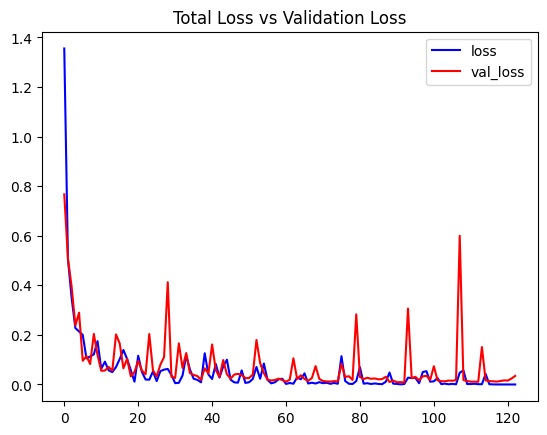

In [68]:
plot_metrics(training_history,'loss','val_loss','Total Loss vs Validation Loss')

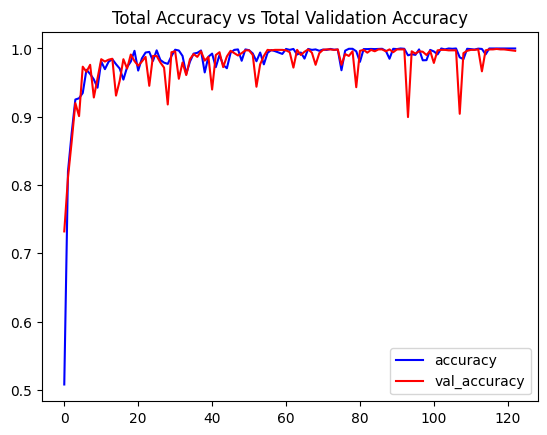

In [69]:
plot_metrics(training_history,'accuracy','val_accuracy','Total Accuracy vs Total Validation Accuracy')

In [70]:
os.makedirs('models',exist_ok=True)
model_evaluation_loss,model_evaluation_accuracy = evaluation_history

# date_time_format = '%Y_%m_%d__%H_%M_%S'
# current_date_time_dt = dt.datetime.now()
# current_date_time_string = dt.datetime.strftime(current_date_time_dt,date_time_format)

classes = len(classes_list)

model_file_name = f'models/SignLang3_model_classes={classes}__Loss_{model_evaluation_loss}__Accuracy_{model_evaluation_accuracy}_with_less_rnn.keras'

model.save(model_file_name)